# 1 задание: умножение

Как требовалось, рассмотрим 3 подхода к реализации умножения в питоне: обычное (руками), через опции jit (использование скомпилированных команд) и через dot в библиотеке numpy.

Для измерения эффективности того или иного способа будем замерять время выполнения умножений квадратных матриц.

In [27]:
import numpy as np
from numba import njit
import time
import psutil
import os

def get_cpu_time(): # Функция для получения времени использования CPU текущим процессом
    process = psutil.Process(os.getpid()) # Получаем информацию о процессе
    return process.cpu_times().user + process.cpu_times().system # Возвращаем сумму пользовательского и системного времени CPU

Функции умножения матриц

In [16]:
def manual_matrix_multiply(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]

    return C

@njit
def numba_matrix_multiply(A, B, C, n):

    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]

    return C

def numpy_dot_multiply(A, B):
    return np.dot(A, B)

In [17]:
current_time = 0
m_size = 8
manualy_time = np.array([])
manualy_size = np.array([])
while (current_time < 10):
    matrix_A = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_B = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_C = np.zeros((m_size,m_size))
    
    start_real_time = get_cpu_time()
    matrix_C = manual_matrix_multiply(matrix_A, matrix_B)
    end_real_time = get_cpu_time()
    current_time = end_real_time - start_real_time
    print(current_time)
    manualy_time = np.append(manualy_time, current_time)
    manualy_size = np.append(manualy_size, m_size)
    m_size = m_size + 8
    

0.0
0.015625
0.015625
0.03125
0.0625
0.09375
0.1875
0.25
0.34375
0.546875
0.671875
0.8125
1.046875
1.34375
1.640625
1.984375
2.4375
3.28125
3.515625
3.859375
4.421875
5.015625
5.859375
7.25
7.5
8.359375
9.46875
10.703125


In [18]:
current_time = 0
m_size = 32
jit_time = np.array([])
jit_size = np.array([])
while (current_time < 10):
    matrix_A = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_B = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_C = np.zeros((m_size,m_size))
    
    start_real_time = get_cpu_time()
    numba_matrix_multiply(matrix_A, matrix_B, matrix_C, m_size)
    end_real_time = get_cpu_time()
    current_time = end_real_time - start_real_time
    print(current_time)
    jit_time = np.append(jit_time, current_time)
    jit_size = np.append(jit_size, m_size)
    m_size = m_size + 32

0.328125
0.0
0.0
0.0
0.015625
0.015625
0.03125
0.03125
0.03125
0.0625
0.09375
0.125
0.140625
0.1875
0.203125
0.421875
0.3125
0.359375
0.4375
0.65625
0.578125
0.6875
0.765625
1.34375
1.0
1.140625
1.265625
2.140625
1.578125
1.875
1.9375
3.34375
2.390625
2.953125
2.9375
4.65625
3.515625
4.71875
4.609375
6.59375
5.125
7.171875
18.203125


In [19]:
current_time = 0
m_size = 64
dot_time = np.array([])
dot_size = np.array([])
while (current_time < 10):
    matrix_A = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_B = np.random.randint(0, 10, size=(m_size, m_size))
    matrix_C = np.zeros((m_size,m_size))
    
    start_real_time = get_cpu_time()
    matrix_C = numpy_dot_multiply(matrix_A, matrix_B) 
    end_real_time = get_cpu_time()
    current_time = end_real_time - start_real_time
    print(current_time)
    dot_time = np.append(dot_time, current_time)
    dot_size = np.append(dot_size, m_size)
    m_size = m_size + 64

0.0
0.015625
0.0
0.015625
0.0625
0.078125
0.140625
0.390625
0.28125
0.515625
0.515625
1.109375
0.875
1.703125
1.421875
2.9375
2.296875
3.671875
3.5625
5.28125
5.390625
7.46875
12.171875


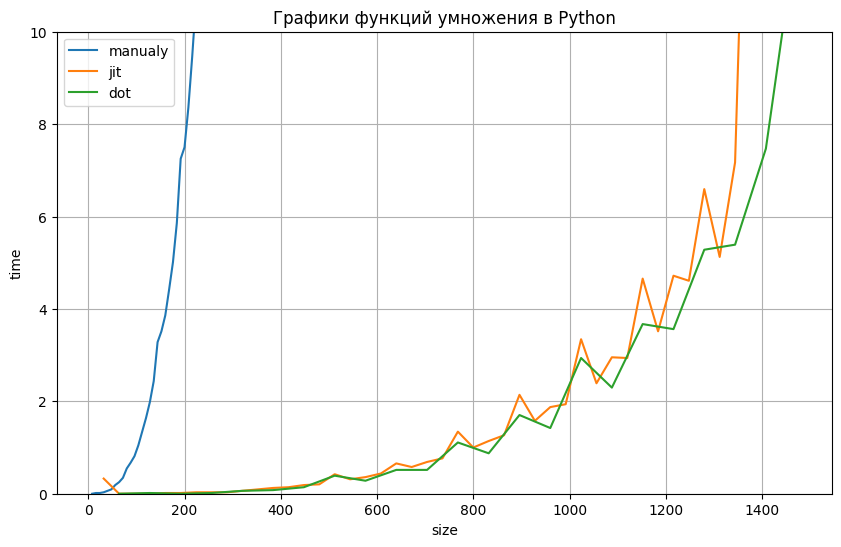

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Строим графики для каждого набора данных
plt.plot(manualy_size, manualy_time, label='manualy')
plt.plot(jit_size, jit_time, label='jit')
plt.plot(dot_size, dot_time, label='dot')

# Добавляем заголовок и подписи осей
plt.title('Графики функций умножения в Python')
plt.xlabel('size')
plt.ylabel('time')
plt.ylim(0,10)

# Добавляем легенду
plt.legend()

# Отображаем график
plt.grid()
plt.show()

Как видно из графика выше, хуже всех оказывается обычное умножение руками - что достаточно очевидно, ведь Python язык интерпретируемый, и множество операций с памятью происходят с большой задержкой. Jit и dot намного лучше справляются с этим, как минимум потому, что в основе умножений в обоих случаях будет выступать низкоуровневый код (асемблер и С/С++), который требует предварительной компиляции (что и приводит к оптимизации). Уже такой код может быть даже легко предсказуем для аппаратуры для более эффективного размещения в кэше.

Попробуем, помимо заявленных способов, использовать С++ и реализуем 3 способа умножения: обычный ручной, продвинутый ручной (распараллеливание, блочное умножение, SIMD инструкции) и библиотечное умножение Eigen.

In [49]:
data = pd.read_csv('eigen_times.txt', header=None)
x_eigen_raw = np.array(data[0])
y_eigen_raw = np.array(data[1])

eigen = np.empty((0,3))

for i in range(len(x_eigen_raw)):
    if (x_eigen_raw[i] in eigen[:,0]):
        eigen[x_eigen_raw[i] // 64 - 1, 1] = eigen[x_eigen_raw[i] // 64 - 1, 1] + y_eigen_raw[i]
        eigen[x_eigen_raw[i] // 64 - 1, 2] = eigen[x_eigen_raw[i] // 64 - 1, 2] + 1
    else:
        eigen = np.vstack([eigen,np.array([[x_eigen_raw[i],y_eigen_raw[i],1]])])
        
eigen[:,1] = eigen[:,1] / eigen[:,2]

In [ ]:
data = pd.read_csv('manual_times.txt', header=None)
x_pro_raw = np.array(data[0])
y_pro_raw = np.array(data[1])

pro = np.empty((0,3))

for i in range(len(x_pro_raw)):
    if (x_pro_raw[i] in pro[:,0]):
        pro[x_pro_raw[i] // 64 - 1, 1] = pro[x_pro_raw[i] // 64 - 1, 1] + y_pro_raw[i]
        pro[x_pro_raw[i] // 64 - 1, 2] = pro[x_pro_raw[i] // 64 - 1, 2] + 1
    else:
        pro = np.vstack([pro,np.array([[x_pro_raw[i],y_pro_raw[i],1]])])
        
pro[:,1] = pro[:,1] / pro[:,2]

In [ ]:
data = pd.read_csv('manual_times.txt', header=None)
x_simple_raw = np.array(data[0])
y_simple_raw = np.array(data[1])

simple = np.empty((0,3))

for i in range(len(x_simple_raw)):
    if (x_simple_raw[i] in pro[:,0]):
        simple[x_simple_raw[i] // 64 - 1, 1] = simple[x_simple_raw[i] // 64 - 1, 1] + y_simple_raw[i]
        simple[x_simple_raw[i] // 64 - 1, 2] = simple[x_simple_raw[i] // 64 - 1, 2] + 1
    else:
        simple = np.vstack([simple,np.array([[x_simple_raw[i],y_simple_raw[i],1]])])
        
simple[:,1] = simple[:,1] / simple[:,2]

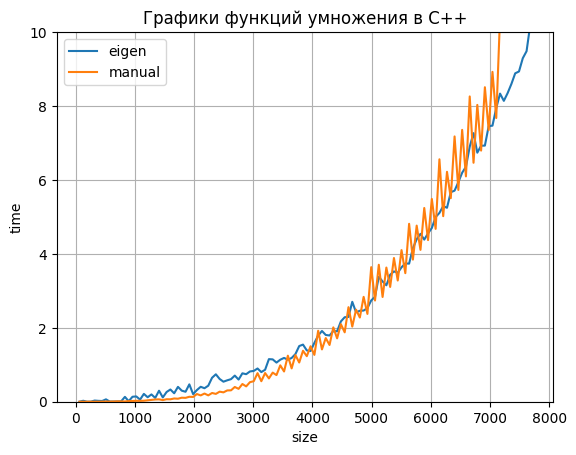

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение данных из файла
data = pd.read_csv('eigen_times.txt', header=None)
y_eigen = np.array(data[0])

data = pd.read_csv('manual_times.txt', header=None)
y_manual = np.array(data[0])

x_eigen = np.arange(64, 64 + 64 * len(y_eigen), 64)

x_manual = np.arange(64, 64 + 64 * len(y_manual), 64)

# Построение графика
plt.plot(x_eigen, y_eigen, label='eigen')
plt.plot(x_manual, y_manual, label='manual')
plt.title('Графики функций умножения в C++')
plt.xlabel('size')
plt.ylabel('time')
plt.ylim(0,10)

plt.legend()

plt.grid()
plt.show()

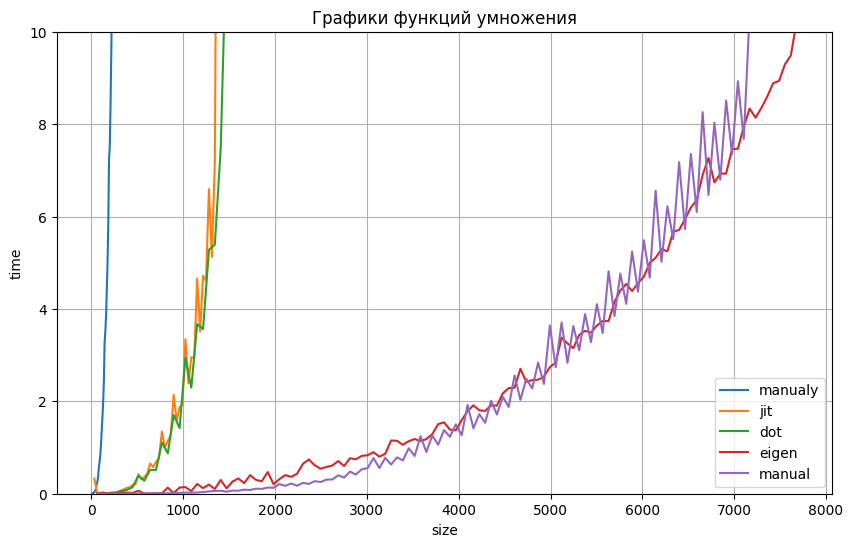

In [22]:
plt.figure(figsize=(10, 6))

# Строим графики для каждого набора данных
plt.plot(manualy_size, manualy_time, label='manualy')
plt.plot(jit_size, jit_time, label='jit')
plt.plot(dot_size, dot_time, label='dot')
plt.plot(x_eigen, y_eigen, label='eigen')
plt.plot(x_manual, y_manual, label='manual')

# Добавляем заголовок и подписи осей
plt.title('Графики функций умножения')
plt.xlabel('size')
plt.ylabel('time')
plt.ylim(0,10)

# Добавляем легенду
plt.legend()

# Отображаем график
plt.grid()
plt.show()


C:\Users\fedor\AppData\Local\Temp\ipykernel_8292\306983186.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(manualy_size), np.log(manualy_time), ".", label='manualy')
C:\Users\fedor\AppData\Local\Temp\ipykernel_8292\306983186.py:5: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(jit_size), np.log(jit_time), ".", label='jit')
C:\Users\fedor\AppData\Local\Temp\ipykernel_8292\306983186.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(dot_size), np.log(dot_time), ".", label='dot')


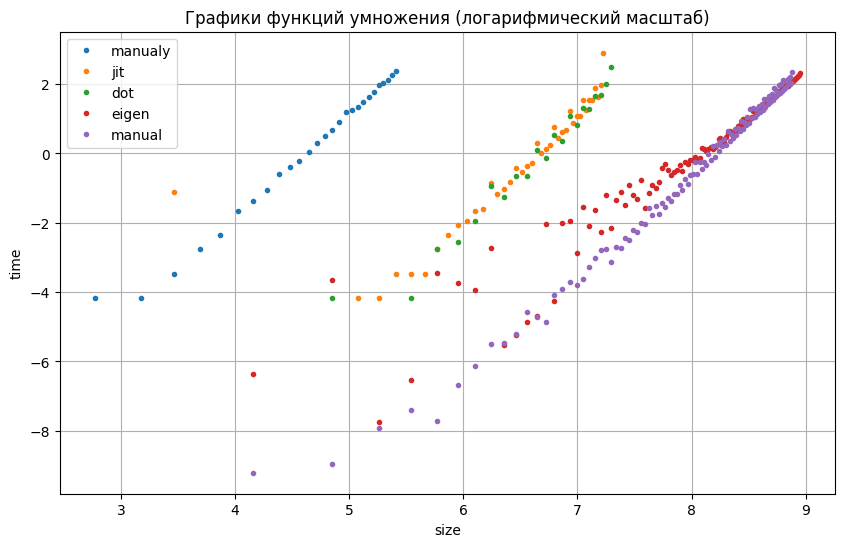

In [26]:
plt.figure(figsize=(10, 6))

# Строим графики для каждого набора данных
plt.plot(np.log(manualy_size), np.log(manualy_time), ".", label='manualy')
plt.plot(np.log(jit_size), np.log(jit_time), ".", label='jit')
plt.plot(np.log(dot_size), np.log(dot_time), ".", label='dot')
plt.plot(np.log(x_eigen), np.log(y_eigen), ".", label='eigen')
plt.plot(np.log(x_manual), np.log(y_manual), ".", label='manual')

# Добавляем заголовок и подписи осей
plt.title('Графики функций умножения (логарифмический масштаб)')
plt.xlabel('size')
plt.ylabel('time')
# plt.ylim(0,10)

# Добавляем легенду
plt.legend()

# Отображаем график
plt.grid()
plt.show()